                                    Loan Approval Prediction: Classification

In [2]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
%matplotlib inline
approval=pd.read_csv('/Users/veere/Downloads/loan approval.csv')
import warnings
warnings.filterwarnings('ignore')

In [3]:
approval.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [4]:
approval.shape

(4269, 13)

In [5]:
approval.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [6]:
approval.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [7]:
approval[' loan_status'].value_counts()

 loan_status
 Approved    2656
 Rejected    1613
Name: count, dtype: int64

In [8]:
approval[' education'].value_counts()

 education
 Graduate        2144
 Not Graduate    2125
Name: count, dtype: int64

In [9]:
approval[' self_employed'].value_counts()

 self_employed
 Yes    2150
 No     2119
Name: count, dtype: int64

In [10]:
#Convert objects labels into categorical
approval[[' education', ' loan_status',' self_employed']] = approval[[' education', ' loan_status',' self_employed']].astype('category')
approval.dtypes

loan_id                         int64
 no_of_dependents               int64
 education                   category
 self_employed               category
 income_annum                   int64
 loan_amount                    int64
 loan_term                      int64
 cibil_score                    int64
 residential_assets_value       int64
 commercial_assets_value        int64
 luxury_assets_value            int64
 bank_asset_value               int64
 loan_status                 category
dtype: object

In [11]:
#Converting category labels into numerical using LabelEncoder
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
approval[' education']=label.fit_transform(approval[' education'])
approval[' loan_status']=label.fit_transform(approval[' loan_status'])
approval[' self_employed']=label.fit_transform(approval[' self_employed'])
approval.dtypes

loan_id                      int64
 no_of_dependents            int64
 education                   int32
 self_employed               int32
 income_annum                int64
 loan_amount                 int64
 loan_term                   int64
 cibil_score                 int64
 residential_assets_value    int64
 commercial_assets_value     int64
 luxury_assets_value         int64
 bank_asset_value            int64
 loan_status                 int32
dtype: object

In [12]:
approval[' loan_status'].value_counts()

 loan_status
0    2656
1    1613
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x23a94beb9a0>,
 [Text(-0.4118671696461923, 1.0199830560198708, 'approved'),
  Text(0.41186726514389654, -1.0199830174580788, 'rejected')],
 [Text(-0.22465481980701396, 0.5563543941926568, '62.2%'),
  Text(0.22465487189667083, -0.556354373158952, '37.8%')])

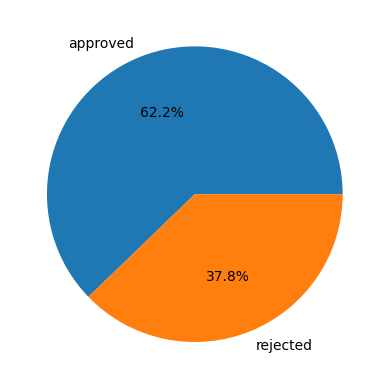

In [13]:
plt.pie(approval[' loan_status'].value_counts(),labels=['approved','rejected'],autopct='%.1f%%')

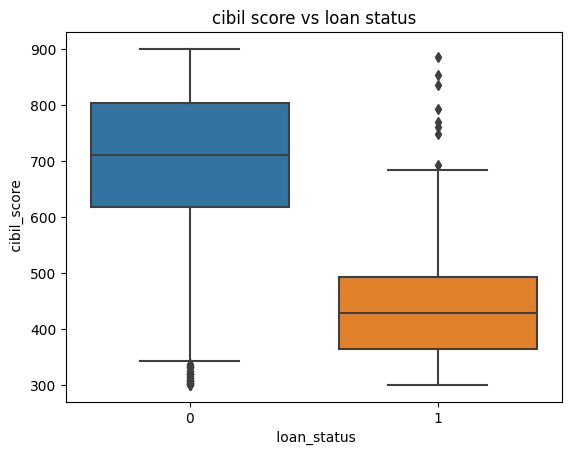

In [14]:
sns.boxplot(x=" loan_status", y=" cibil_score", data=approval)
plt.title("cibil score vs loan status")
plt.show()

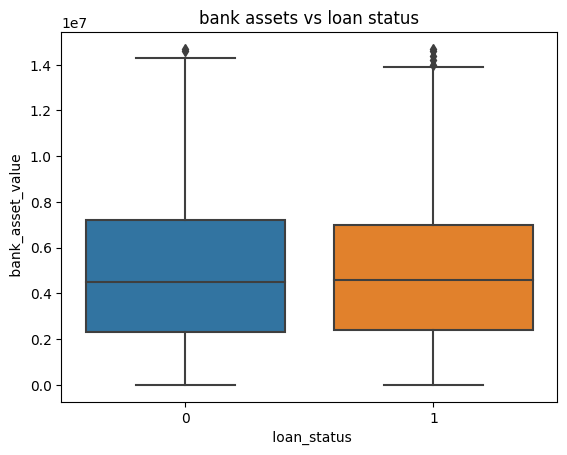

In [15]:
sns.boxplot(x=" loan_status", y=" bank_asset_value", data=approval)
plt.title("bank assets vs loan status")
plt.show()

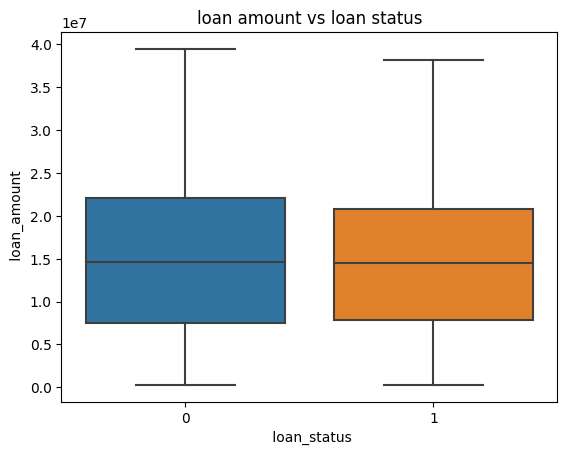

In [16]:
sns.boxplot(x=" loan_status", y=" loan_amount", data=approval)
plt.title("loan amount vs loan status")
plt.show()

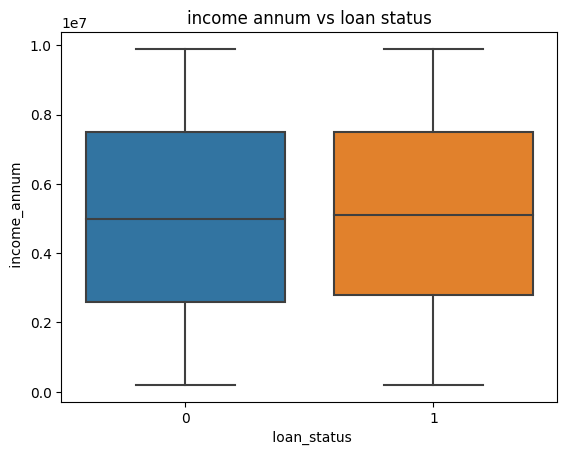

In [17]:
sns.boxplot(x=" loan_status", y=" income_annum", data=approval)
plt.title("income annum vs loan status")
plt.show()

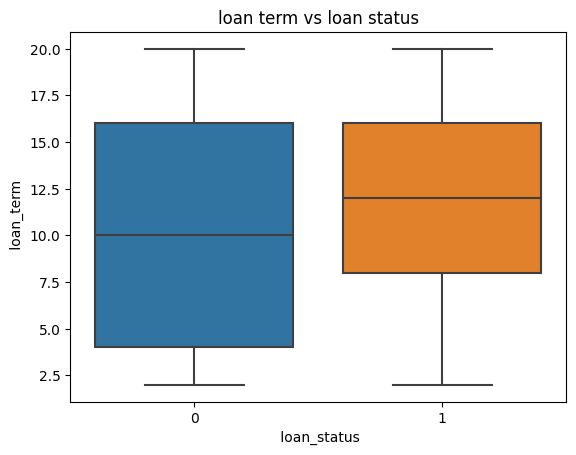

In [18]:
sns.boxplot(x=" loan_status", y=" loan_term", data=approval)
plt.title("loan term vs loan status")
plt.show()

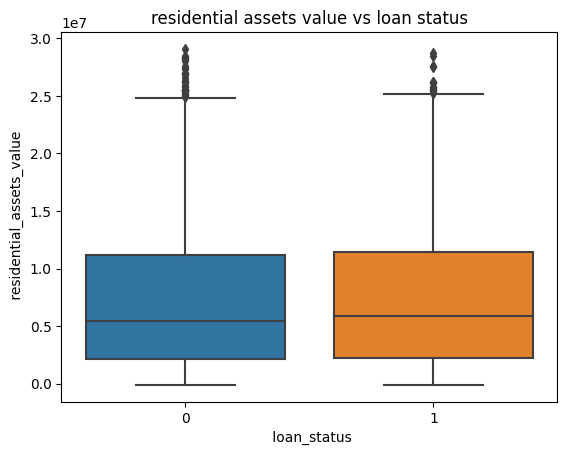

In [19]:
sns.boxplot(x=" loan_status", y=" residential_assets_value", data=approval)
plt.title("residential assets value vs loan status")
plt.show()

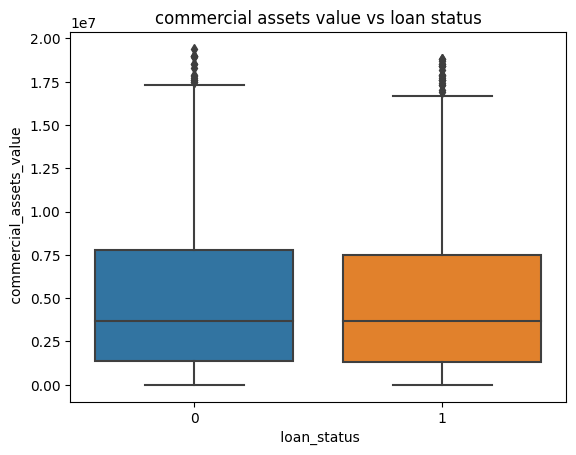

In [20]:
sns.boxplot(x=" loan_status", y=" commercial_assets_value", data=approval)
plt.title("commercial assets value vs loan status")
plt.show()

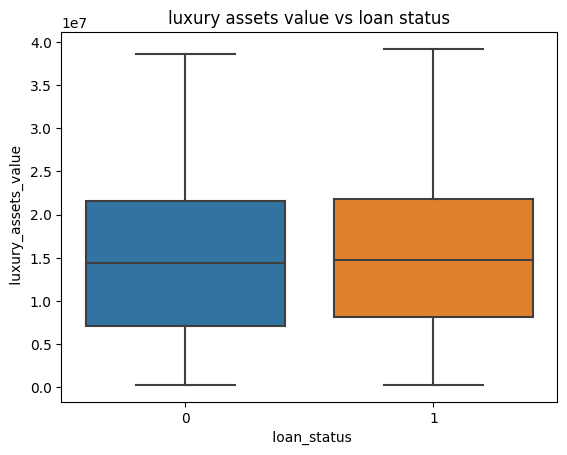

In [21]:
sns.boxplot(x=" loan_status", y=" luxury_assets_value", data=approval)
plt.title("luxury assets value vs loan status")
plt.show()

<Axes: xlabel=' no_of_dependents', ylabel='count'>

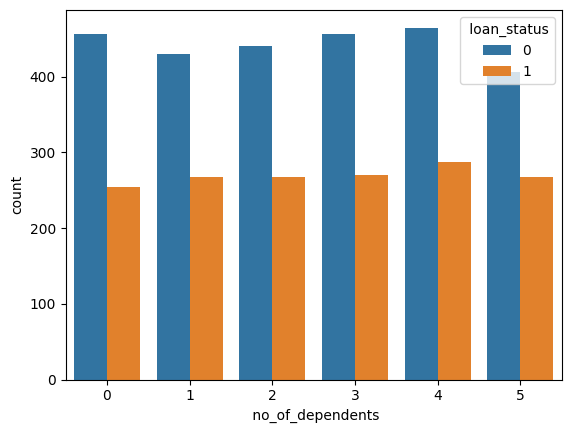

In [22]:
sns.countplot(x=' no_of_dependents',data=approval,hue=' loan_status')


<Axes: xlabel=' education', ylabel='count'>

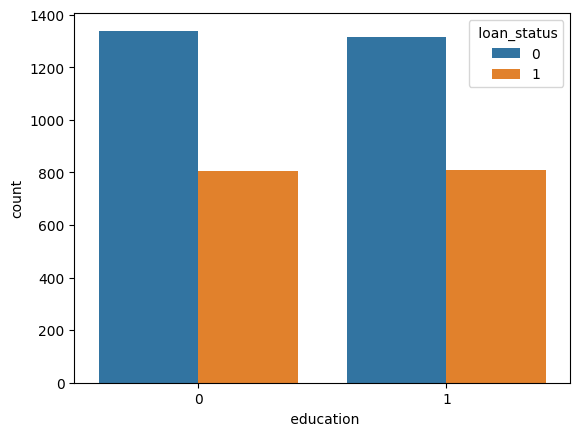

In [23]:
sns.countplot(x=' education',data=approval,hue=' loan_status')

<Axes: xlabel=' self_employed', ylabel='count'>

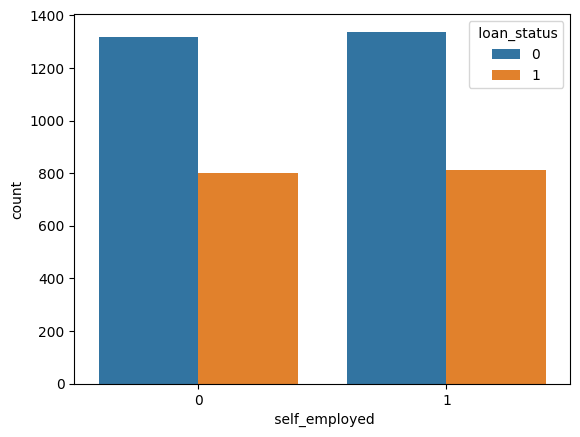

In [24]:
sns.countplot(x=' self_employed',data=approval,hue=' loan_status')

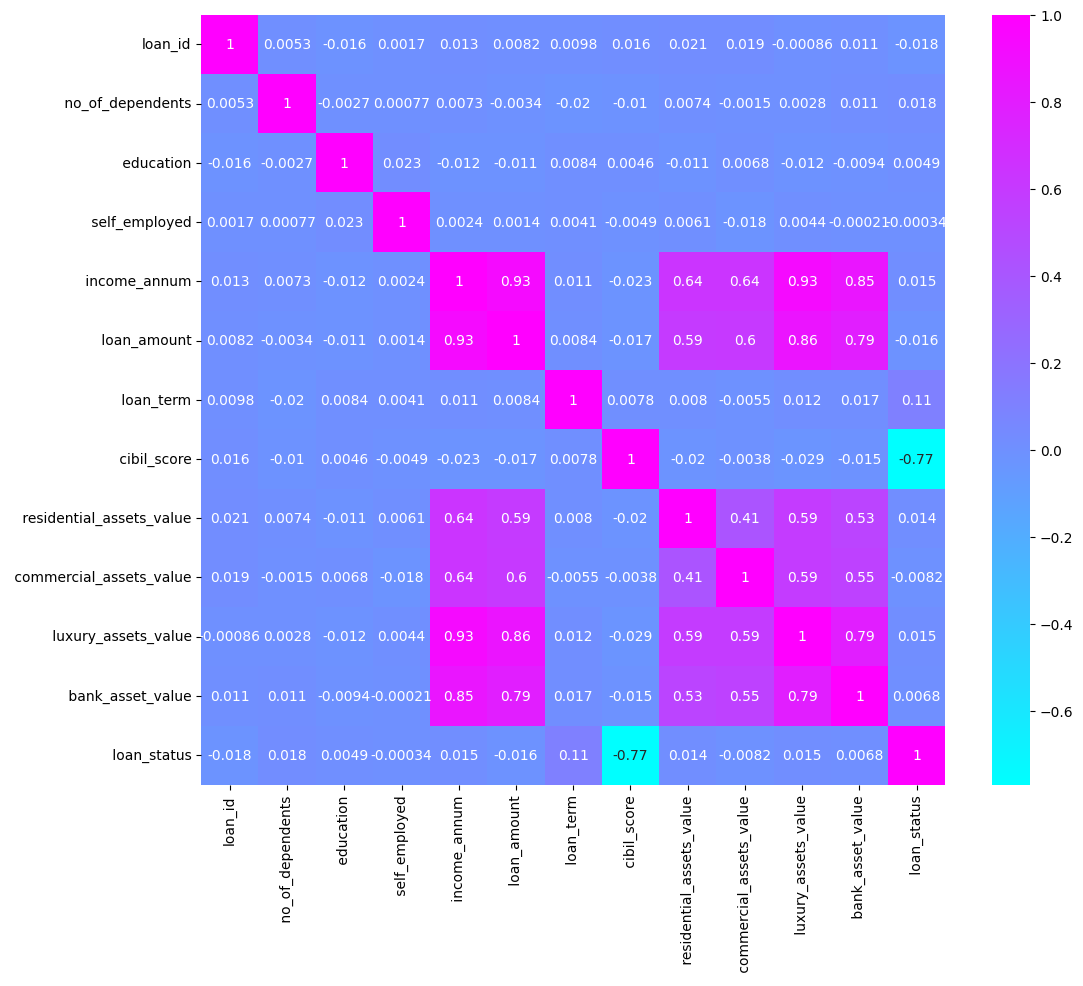

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
ax = sns.heatmap(approval.corr(), annot=True, cmap='cool')
#checking multicollinearity

In [26]:
approval=approval.drop(['loan_id'],axis=1)

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,classification_report
model=LogisticRegression()

x = approval.drop([' loan_status'], axis = 1)
y = approval[' loan_status']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.61      1.00      0.76       523
           1       1.00      0.00      0.01       331

    accuracy                           0.61       854
   macro avg       0.81      0.50      0.38       854
weighted avg       0.76      0.61      0.47       854



In [28]:
#multicollinearity
#using vif
from sklearn.model_selection import train_test_split
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
x = approval.drop([' loan_status'], axis = 1)
y = approval[' loan_status']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
vif_approval=pd.DataFrame()
vif_approval['column']=approval.columns[0:11]
vif_approval['vif']=[variance_inflation_factor(x_train,i) for i in range(x_train.shape[1])]
vif_approval.sort_values(by='vif',ascending=False)

,column,vif
3,income_annum,75.336020
9,luxury_assets_value,27.249019
4,loan_amount,27.216069
10,bank_asset_value,12.186652
6,cibil_score,6.533343
5,loan_term,3.954270
8,commercial_assets_value,3.952807
7,residential_assets_value,3.945307
0,no_of_dependents,2.874287
2,self_employed,1.936009


In [29]:
x = approval.drop([' loan_status',' income_annum'], axis = 1)
y = approval[' loan_status']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
vif_approval=pd.DataFrame()
vif_approval['column']=x.columns[0:10]
vif_approval['vif']=[variance_inflation_factor(x_train,i) for i in range(x_train.shape[1])]
vif_approval.sort_values(by='vif',ascending=False)

,column,vif
3,loan_amount,17.586712
8,luxury_assets_value,17.126490
9,bank_asset_value,10.055551
5,cibil_score,6.501319
4,loan_term,3.947453
7,commercial_assets_value,3.820372
6,residential_assets_value,3.781749
0,no_of_dependents,2.863825
2,self_employed,1.934708
1,education,1.913104


In [30]:
x = approval.drop([' loan_status',' income_annum',' loan_amount'], axis = 1)
y = approval[' loan_status']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
vif_approval=pd.DataFrame()
vif_approval['column']=x.columns[0:9]
vif_approval['vif']=[variance_inflation_factor(x_train,i) for i in range(x_train.shape[1])]
vif_approval.sort_values(by='vif',ascending=False)

,column,vif
7,luxury_assets_value,11.618713
8,bank_asset_value,9.125226
4,cibil_score,6.457724
3,loan_term,3.946923
5,residential_assets_value,3.691352
6,commercial_assets_value,3.689431
0,no_of_dependents,2.863385
2,self_employed,1.934094
1,education,1.912976


In [31]:
x = approval.drop([' loan_status',' income_annum',' loan_amount',' luxury_assets_value'], axis = 1)
y = approval[' loan_status']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
vif_approval=pd.DataFrame()
vif_approval['column']=x.columns[0:8]
vif_approval['vif']=[variance_inflation_factor(x_train,i) for i in range(x_train.shape[1])]
vif_approval.sort_values(by='vif',ascending=False)

,column,vif
4,cibil_score,6.393220
7,bank_asset_value,5.585796
3,loan_term,3.928090
6,commercial_assets_value,3.410687
5,residential_assets_value,3.347463
0,no_of_dependents,2.859440
2,self_employed,1.930807
1,education,1.912520


In [32]:
x = approval.drop([' loan_status',' income_annum',' loan_amount',' luxury_assets_value',' bank_asset_value'], axis = 1)
y = approval[' loan_status']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
vif_approval=pd.DataFrame()
vif_approval['column']=x.columns[0:7]
vif_approval['vif']=[variance_inflation_factor(x_train,i) for i in range(x_train.shape[1])]
vif_approval.sort_values(by='vif',ascending=False)

,column,vif
4,cibil_score,6.230746
3,loan_term,3.885979
0,no_of_dependents,2.843155
5,residential_assets_value,2.766852
6,commercial_assets_value,2.709257
2,self_employed,1.929032
1,education,1.910550


In [33]:
x = approval.drop([' loan_status',' income_annum',' loan_amount',' luxury_assets_value',' loan_term',' bank_asset_value'], axis = 1)
y = approval[' loan_status']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
vif_approval=pd.DataFrame()
vif_approval['column']=x.columns[0:6]
vif_approval['vif']=[variance_inflation_factor(x_train,i) for i in range(x_train.shape[1])]
vif_approval.sort_values(by='vif',ascending=False)

,column,vif
3,cibil_score,4.839232
0,no_of_dependents,2.802911
4,residential_assets_value,2.750787
5,commercial_assets_value,2.703424
2,self_employed,1.909719
1,education,1.889915


In [34]:
model=LogisticRegression()
x= approval.drop([' loan_status',' income_annum',' loan_amount',' luxury_assets_value',' loan_term',' bank_asset_value'], axis = 1)
y = approval[' loan_status']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.62      1.00      0.76       527
           1       0.00      0.00      0.00       327

    accuracy                           0.62       854
   macro avg       0.31      0.50      0.38       854
weighted avg       0.38      0.62      0.47       854



In [35]:
import statsmodels.api as sm
X = sm.add_constant(x)

# Fit a logistic regression model
model = sm.Logit(y, X).fit()

# Get a summary of the logistic regression model
summary = model.summary()

# Print the summary
print(summary)

Optimization terminated successfully.
         Current function value: 0.251756
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:            loan_status   No. Observations:                 4269
Model:                          Logit   Df Residuals:                     4262
Method:                           MLE   Df Model:                            6
Date:                Tue, 03 Oct 2023   Pseudo R-squ.:                  0.6203
Time:                        13:15:30   Log-Likelihood:                -1074.7
converged:                       True   LL-Null:                       -2830.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        11.3986      0.395     28.822      0.000      10.

In [36]:
x= approval.drop([' loan_status',' residential_assets_value',' income_annum',' loan_amount',' luxury_assets_value',' loan_term',' bank_asset_value'], axis = 1)
X = sm.add_constant(x)

# Fit a logistic regression model
model = sm.Logit(y, X).fit()

# Get a summary of the logistic regression model
summary = model.summary()

# Print the summary
print(summary)

Optimization terminated successfully.
         Current function value: 0.251763
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:            loan_status   No. Observations:                 4269
Model:                          Logit   Df Residuals:                     4263
Method:                           MLE   Df Model:                            5
Date:                Tue, 03 Oct 2023   Pseudo R-squ.:                  0.6203
Time:                        13:15:30   Log-Likelihood:                -1074.8
converged:                       True   LL-Null:                       -2830.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       11.4093      0.393     29.035      0.000      10.639

In [37]:
x=approval[[' education',' self_employed',' cibil_score',' commercial_assets_value']]
X = sm.add_constant(x)

# Fit a logistic regression model
model = sm.Logit(y, X).fit()

# Get a summary of the logistic regression model
summary = model.summary()

# Print the summary
print(summary)

Optimization terminated successfully.
         Current function value: 0.251775
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:            loan_status   No. Observations:                 4269
Model:                          Logit   Df Residuals:                     4264
Method:                           MLE   Df Model:                            4
Date:                Tue, 03 Oct 2023   Pseudo R-squ.:                  0.6202
Time:                        13:15:30   Log-Likelihood:                -1074.8
converged:                       True   LL-Null:                       -2830.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       11.4375      0.383     29.829      0.000      10.686

In [38]:
x=approval[[' self_employed',' cibil_score',' commercial_assets_value']]
X = sm.add_constant(x)

# Fit a logistic regression model
model = sm.Logit(y, X).fit()

# Get a summary of the logistic regression model
summary = model.summary()

# Print the summary
print(summary)

Optimization terminated successfully.
         Current function value: 0.251813
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:            loan_status   No. Observations:                 4269
Model:                          Logit   Df Residuals:                     4265
Method:                           MLE   Df Model:                            3
Date:                Tue, 03 Oct 2023   Pseudo R-squ.:                  0.6202
Time:                        13:15:30   Log-Likelihood:                -1075.0
converged:                       True   LL-Null:                       -2830.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       11.4658      0.381     30.129      0.000      10.720

In [39]:
x=approval[[' cibil_score',' commercial_assets_value']]
X = sm.add_constant(x)

# Fit a logistic regression model
model = sm.Logit(y, X).fit()

# Get a summary of the logistic regression model
summary = model.summary()

# Print the summary
print(summary)

Optimization terminated successfully.
         Current function value: 0.251861
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:            loan_status   No. Observations:                 4269
Model:                          Logit   Df Residuals:                     4266
Method:                           MLE   Df Model:                            2
Date:                Tue, 03 Oct 2023   Pseudo R-squ.:                  0.6201
Time:                        13:15:30   Log-Likelihood:                -1075.2
converged:                       True   LL-Null:                       -2830.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       11.4270      0.375     30.459      0.000      10.692

In [40]:
x=approval[[' cibil_score']]
X = sm.add_constant(x)

# Fit a logistic regression model
model = sm.Logit(y, X).fit()

# Get a summary of the logistic regression model
summary = model.summary()

# Print the summary
print(summary)

Optimization terminated successfully.
         Current function value: 0.251998
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:            loan_status   No. Observations:                 4269
Model:                          Logit   Df Residuals:                     4267
Method:                           MLE   Df Model:                            1
Date:                Tue, 03 Oct 2023   Pseudo R-squ.:                  0.6199
Time:                        13:15:30   Log-Likelihood:                -1075.8
converged:                       True   LL-Null:                       -2830.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           11.3542      0.368     30.863      0.000      10.633      12.075
 cibil_score    -0.0215

In [41]:
#but cibil score is almost surely independent of bank,residential and commercial assets value 
model=LogisticRegression()

x = approval[[' cibil_score']]
y = approval[' loan_status']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       516
           1       0.90      0.87      0.89       338

    accuracy                           0.91       854
   macro avg       0.91      0.91      0.91       854
weighted avg       0.91      0.91      0.91       854



In [43]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()
x = approval.drop([' loan_status'], axis = 1)
y = approval[' loan_status']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
DT.fit(x_train, y_train)
y_pred = DT.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       523
           1       0.96      0.95      0.96       331

    accuracy                           0.97       854
   macro avg       0.97      0.96      0.97       854
weighted avg       0.97      0.97      0.97       854



[Text(0.7197431144067796, 0.9736842105263158, 'x[6] <= 549.5\ngini = 0.469\nsamples = 3415\nvalue = [2133, 1282]'),
 Text(0.5708421610169492, 0.9210526315789473, 'x[5] <= 5.0\ngini = 0.183\nsamples = 1416\nvalue = [144, 1272]'),
 Text(0.5538930084745762, 0.868421052631579, 'x[4] <= 26250000.0\ngini = 0.499\nsamples = 276\nvalue = [144, 132]'),
 Text(0.4976165254237288, 0.8157894736842105, 'x[3] <= 7100000.0\ngini = 0.496\nsamples = 238\nvalue = [109, 129]'),
 Text(0.4359110169491525, 0.7631578947368421, 'x[4] <= 16600000.0\ngini = 0.495\nsamples = 194\nvalue = [107, 87]'),
 Text(0.3633474576271186, 0.7105263157894737, 'x[3] <= 5050000.0\ngini = 0.496\nsamples = 155\nvalue = [71, 84]'),
 Text(0.3029661016949153, 0.6578947368421053, 'x[8] <= 5600000.0\ngini = 0.496\nsamples = 129\nvalue = [70, 59]'),
 Text(0.2330508474576271, 0.6052631578947368, 'x[4] <= 10100000.0\ngini = 0.483\nsamples = 115\nvalue = [68, 47]'),
 Text(0.1440677966101695, 0.5526315789473685, 'x[9] <= 6450000.0\ngini = 0

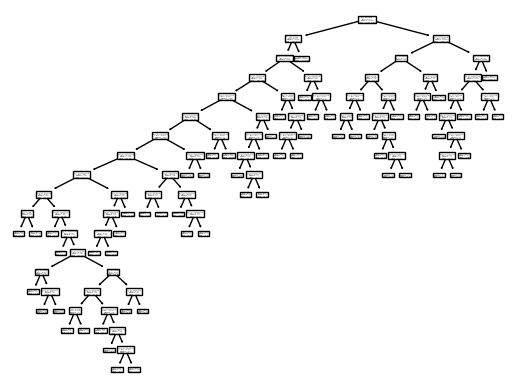

In [47]:
from sklearn import tree
tree.plot_tree(DT)

In [44]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [None, 5,10,15,20,25],             # Maximum depth of the tree
    'min_samples_split': [1,3, 5,7,9],           # Minimum samples required to split an internal node
    'min_samples_leaf': [1,3,5,7,9],            # Minimum samples required to be at a leaf node
}
clf = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5,scoring='accuracy')

# Fit the model to the data
grid_search.fit(x, y)
print("Best Parameters:", grid_search.best_params_)

# Access the best model
best_model = grid_search.best_estimator_

Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5}


In [45]:
best_model.fit(x_train, y_train)
y_pred = best_model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       523
           1       0.97      0.95      0.96       331

    accuracy                           0.97       854
   macro avg       0.97      0.96      0.97       854
weighted avg       0.97      0.97      0.97       854



[Text(0.7051478794642857, 0.9736842105263158, 'x[6] <= 549.5\ngini = 0.469\nsamples = 3415\nvalue = [2133, 1282]'),
 Text(0.5486886160714286, 0.9210526315789473, 'x[5] <= 5.0\ngini = 0.183\nsamples = 1416\nvalue = [144, 1272]'),
 Text(0.5308314732142857, 0.868421052631579, 'x[4] <= 26250000.0\ngini = 0.499\nsamples = 276\nvalue = [144, 132]'),
 Text(0.47237723214285715, 0.8157894736842105, 'x[3] <= 7100000.0\ngini = 0.496\nsamples = 238\nvalue = [109, 129]'),
 Text(0.40904017857142855, 0.7631578947368421, 'x[4] <= 16600000.0\ngini = 0.495\nsamples = 194\nvalue = [107, 87]'),
 Text(0.3359375, 0.7105263157894737, 'x[3] <= 5050000.0\ngini = 0.496\nsamples = 155\nvalue = [71, 84]'),
 Text(0.27901785714285715, 0.6578947368421053, 'x[8] <= 5600000.0\ngini = 0.496\nsamples = 129\nvalue = [70, 59]'),
 Text(0.21875, 0.6052631578947368, 'x[4] <= 10100000.0\ngini = 0.483\nsamples = 115\nvalue = [68, 47]'),
 Text(0.15178571428571427, 0.5526315789473685, 'x[9] <= 6450000.0\ngini = 0.5\nsamples = 90

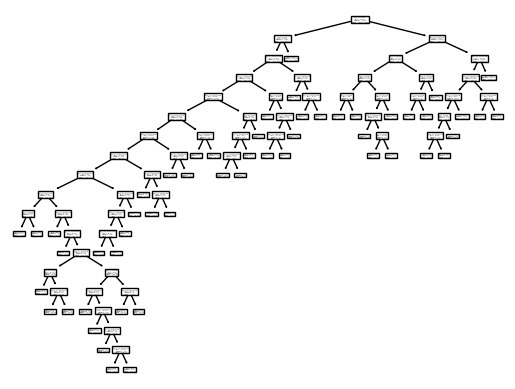

In [46]:

tree.plot_tree(best_model)

In [42]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier(oob_score=True)
x = approval.drop([' loan_status'], axis = 1)
y = approval[' loan_status']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
RF.fit(x_train, y_train)
y_pred = RF.predict(x_test)
print(classification_report(y_test,y_pred))
RF.oob_score_

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       523
           1       0.98      0.98      0.98       331

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



0.9777452415812592

In [199]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
param_grid = {
    'max_depth': [None, 5,10,15,20],             # Maximum depth of the tree
    'min_samples_split': [1,3, 5,7,9],           # Minimum samples required to split an internal node
    'min_samples_leaf': [1,3,5,7,9],
    'max_features': ['auto', 'sqrt', 'log2'],
    'n_estimators':[50,100,150,200,250.300] 
    # Minimum samples required to be at a leaf node
    
}
rfc = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5,n_jobs=-1,scoring='accuracy')

# Fit the model to the data
grid_search.fit(x, y)
print("Best Parameters:", grid_search.best_params_)

# Access the best model
best_model = grid_search.best_estimator_

Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 3, 'n_estimators': 100}


In [156]:
best_model.fit(x_train, y_train)
y_pred = best_model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       523
           1       0.98      0.98      0.98       331

    accuracy                           0.99       854
   macro avg       0.99      0.99      0.99       854
weighted avg       0.99      0.99      0.99       854

